## qflib Library Examples

In [1]:
import qflib as qf
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print("qflib version: {0}".format(qf.version()))
print("pid: {0}".format(os.getpid()))

qflib version: 0.6.0-debug
pid: 4540


In [2]:
name = "World"
print(qf.sayHello(name))

Hello World!


In [3]:
x = [1, 2, 3]
y = [4, 5]
op = qf.outerProd(x, y)
print(f'x: {x}\ny: {y}')
print(f'outerProd:\n{op}')

x: [1, 2, 3]
y: [4, 5]
outerProd:
[[ 4.  5.]
 [ 8. 10.]
 [12. 15.]]


In [4]:
# Matrix Echo
m = np.array([[1, 2, 3], [4, 5, 6]])
em = qf.echoMatrix(m)
print(f'orig matrix:\n{m}')
print(f'echo matrix:\n{em}')

orig matrix:
[[1 2 3]
 [4 5 6]]
echo matrix:
[[1. 2. 3.]
 [4. 5. 6.]]


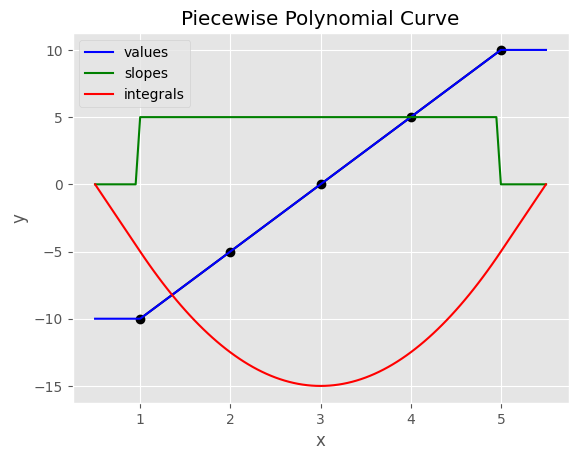

In [5]:
# Piecewise Polynomial Curves
xbpt = np.arange(1, 6)
yval =  np.arange(-10, 15, 5)
pord = 1
xval = np.arange(0.5, 5.55, 0.05)
pval = qf.ppolyEval(xbpt, yval, pord, xval, 0)
pder = qf.ppolyEval(xbpt, yval, pord, xval, 1)
pint = qf.ppolyIntegral(xbpt, yval, pord, xval[0], xval)

# plot
plt.plot(xbpt, yval, color='black', marker='o')
plt.plot(xval, pval, color='blue', label="values")
plt.plot(xval, pder, color='green', label="slopes")
plt.plot(xval, pint, color='red', label="integrals")
plt.title("Piecewise Polynomial Curve")
plt.legend(loc="upper left")
plt.xlabel('x')
plt.ylabel('y');

### Analytic Prices

In [6]:
#fwdprice
fwdpx = qf.fwdPrice(spot = 100, timetoexp = 1.0, intrate = 0.02, divyield = 0.04)
print('Forward price analytic solution')
print(f'Price={fwdpx:.4f}')

Forward price analytic solution
Price=98.0199


In [7]:
#digibs
digi = qf.digiBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.02, divyield = 0.04, volatility = 0.2)
print('Digital option using Black-Scholes analytic solution')
print(f'Price={digi}')

Digital option using Black-Scholes analytic solution
Price=0.4124090746144899


In [8]:
#eurobs
euro = qf.euroBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.02, divyield = 0.04, volatility = 0.4)
print('European option using Black-Scholes analytic solution')
print(f'Price={euro}')

European option using Black-Scholes analytic solution
Price=14.432724162013134


### Market Objects

In [9]:
#yccreate
ycname = "USD"
yc = qf.ycCreate(ycname = ycname, 
                  tmats = [1/12,   1/4,  1/2,   3/4,    1,     2,    3,     4,    5,      10], 
                  vals =  [0.01,  0.02, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.0575, 0.065],
                  valtype = 0)
print(f'Created yield curve: {yc}')

Created yield curve: USD


In [10]:
#discount, spotrate, fwdrate
tmat = 2.0 # years
tfix = 1.0 # years
df = qf.discount(ycname = yc, tmat = tmat)
spotrate = qf.spotRate(ycname = yc, tmat = tmat)
fwdrate = qf.fwdRate(ycname = yc, tmat1 = tfix, tmat2 = tmat)
print(f'Maturity={tmat} years, DF={df:.4f}, SpotRate={spotrate:.4f}, FwdRate={fwdrate:.4f}')

Maturity=2.0 years, DF=0.9139, SpotRate=0.0450, FwdRate=0.0500


In [11]:
#create a 2 year weekly array
tweekly = [i / 52.0 for i in range(1, 105)]
spotRates = [qf.spotRate(yc, tmat) for tmat in tweekly] 
fwdRates = [qf.fwdRate(yc, tmat1, tmat2 ) for tmat1, tmat2 in zip(tweekly[:-1], tweekly[1:])]
fwdRates.insert(0, qf.fwdRate(yc, 0, tweekly[0]))

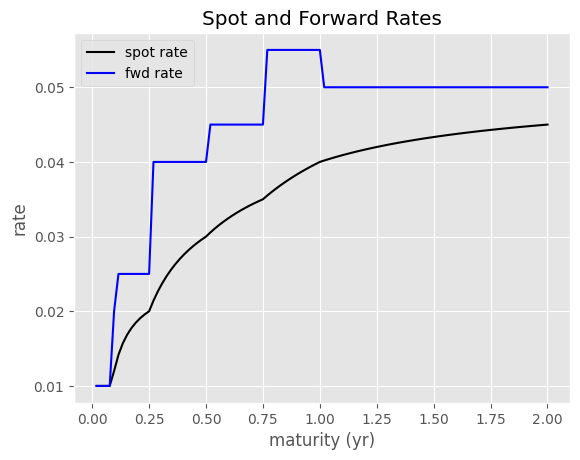

In [12]:
# plot
plt.plot(tweekly, spotRates, color='black', label="spot rate")
plt.plot(tweekly, fwdRates, color='blue', label="fwd rate")
plt.title("Spot and Forward Rates")
plt.legend(loc="upper left")
plt.xlabel('maturity (yr)')
plt.ylabel('rate');

In [13]:
# list market contents
print(qf.mktList())

{'YieldCurves': ['USD']}
